In [1]:
import numpy as np
import pandas as pd



# 1. num of lines

In [23]:
!wc /Users/nephidei/Downloads/bookings.csv

 10000011 279827136 4244874509 /Users/nephidei/Downloads/bookings.csv


In [24]:
!wc /Users/nephidei/Downloads/searches.csv

 20390198 20496592 3696229366 /Users/nephidei/Downloads/searches.csv


# 2. top airports

## 2.1. make small parts of data

In [2]:
import itertools

def slicefile(filename, start, end):
    lines = open(filename)
    return itertools.islice(lines, start, end)

In [10]:
#way1
num = 10000011
step = 100000
for i in range(0,num, step):
    print 'file '+str(i)+' started'
    out = open('tables/bookings_'+str(i)+'.csv', "w")
    for line in slicefile("/Users/nephidei/Downloads/bookinhs.csv", i+1, i+step):
        out.writelines(line.replace('^', ';').split('\n'))
    print 'file '+str(i)+' finished'

In [3]:
#way2
LINES_TO_FLUSH = 100000
with open("/Users/nephidei/Downloads/bookings.csv") as source_file:
    out_buf = []
    out_index = 1
    for i, line in enumerate(source_file):
        if i == 0:
            continue
        #print 'file '+str(i)+' started'
        out_buf.append(line.replace('^', ';'))
        if len(out_buf) == LINES_TO_FLUSH:
            with open('tables/bookings_'+str(out_index)+'.csv', "w") as part_file:
                part_file.writelines(out_buf)
            out_index += 1
            out_buf = []  
    print out_index 

101


In [4]:
table_names = list(slicefile("/Users/nephidei/Downloads/bookings.csv", 0, 1))[0].rstrip().replace('^', ';').split(';')
for i,name in enumerate(table_names):
    table_names[i] = name.replace(' ', '')

print table_names


['act_date', 'source', 'pos_ctry', 'pos_iata', 'pos_oid', 'rloc', 'cre_date', 'duration', 'distance', 'dep_port', 'dep_city', 'dep_ctry', 'arr_port', 'arr_city', 'arr_ctry', 'lst_port', 'lst_city', 'lst_ctry', 'brd_port', 'brd_city', 'brd_ctry', 'off_port', 'off_city', 'off_ctry', 'mkt_port', 'mkt_city', 'mkt_ctry', 'intl', 'route', 'carrier', 'bkg_class', 'cab_class', 'brd_time', 'off_time', 'pax', 'year', 'month', 'oid']


In [5]:
ex = pd.read_csv('tables/bookings_1.csv', sep = ';', names = table_names)
ex.head()

,act_date,source,pos_ctry,pos_iata,pos_oid,rloc,cre_date,duration,distance,dep_port,...,route,carrier,bkg_class,cab_class,brd_time,off_time,pax,year,month,oid
0,2013-03-05 00:00:00,1A,DE,a68dd7ae953c8acfb187a1af2dcbe123,1a11ae49fcbf545fd2afc1a24d88d2b7,ea65900e72d71f4626378e2ebd298267,2013-02-22 00:00:00,1708,0,ZRH,...,LHRZRH,VI,T,Y,2013-03-07 08:50:00,2013-03-07 11:33:37,-1,2013,3,NULL
1,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,...,SALATLCLT,NV,L,Y,2013-04-12 13:04:00,2013-04-12 22:05:40,1,2013,3,NULL
2,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,...,CLTATLSAL,NV,U,Y,2013-07-15 07:00:00,2013-07-15 11:34:51,1,2013,3,NULL
3,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,...,AKLHKGSVO,XK,G,Y,2013-04-24 23:59:00,2013-04-25 16:06:31,1,2013,3,SYDA82546
4,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,...,SVOHKGAKL,XK,G,Y,2013-05-14 20:15:00,2013-05-16 10:44:50,1,2013,3,SYDA82546


In [28]:
def get_top(df):
    df.act_date2 = pd.Series([x.split('-')[0] for x in df.act_date.tolist()])
    df = df[df.act_date2 == '2013']
    top = df.groupby(['arr_port']).sum().reset_index()[['arr_port', 'pax']]
    return top
                                                              

In [8]:
from os import listdir
files = listdir('tables')

In [42]:
res = pd.DataFrame()
for f in files:
    df = pd.read_csv('tables/'+f, sep = ';', names = table_names)
    res = res.append(get_top(df))
    print f
    del(df)

bookings_1.csv
bookings_10.csv
bookings_100.csv
bookings_11.csv
bookings_12.csv
bookings_13.csv
bookings_14.csv
bookings_15.csv
bookings_16.csv
bookings_17.csv
bookings_18.csv
bookings_19.csv
bookings_2.csv
bookings_20.csv
bookings_21.csv
bookings_22.csv
bookings_23.csv
bookings_24.csv
bookings_25.csv
bookings_26.csv
bookings_27.csv
bookings_28.csv
bookings_29.csv
bookings_3.csv
bookings_30.csv
bookings_31.csv
bookings_32.csv
bookings_33.csv
bookings_34.csv
bookings_35.csv
bookings_36.csv
bookings_37.csv
bookings_38.csv
bookings_39.csv
bookings_4.csv
bookings_40.csv
bookings_41.csv
bookings_42.csv
bookings_43.csv
bookings_44.csv
bookings_45.csv
bookings_46.csv
bookings_47.csv
bookings_48.csv
bookings_49.csv
bookings_5.csv
bookings_50.csv
bookings_51.csv
bookings_52.csv
bookings_53.csv
bookings_54.csv
bookings_55.csv
bookings_56.csv
bookings_57.csv
bookings_58.csv
bookings_59.csv
bookings_6.csv
bookings_60.csv
bookings_61.csv
bookings_62.csv
bookings_63.csv
bookings_64.csv
bookings_65.c

In [46]:
print res.groupby('arr_port').sum().reset_index().sort('pax', ascending = False)[:10]

      arr_port    pax
1088  LHR       88809
1190  MCO       70930
1050  LAX       70530
1047  LAS       69626
886   JFK       66270
315   CDG       64490
216   BKK       59460
1228  MIA       58150
1719  SFO       58000
517   DXB       55590


# 3. top searches

In [53]:
!mkdir searches

In [54]:
LINES_TO_FLUSH = 100000
with open("/Users/nephidei/Downloads/searches.csv") as source_file:
    out_buf = []
    out_index = 1
    for i, line in enumerate(source_file):
        if i == 0:
            continue
        #print 'file '+str(i)+' started'
        out_buf.append(line.replace('^', ';'))
        if len(out_buf) == LINES_TO_FLUSH:
            with open('searches/searches_'+str(out_index)+'.csv', "w") as part_file:
                part_file.writelines(out_buf)
            out_index += 1
            out_buf = []  
    print out_index 

204


In [10]:
table_names2 = list(slicefile("/Users/nephidei/Downloads/searches.csv", 0, 1))[0].rstrip().replace('^', ';').split(';')
for i,name in enumerate(table_names2):
    table_names2[i] = name.replace(' ', '')

print table_names2

['Date', 'Time', 'TxnCode', 'OfficeID', 'Country', 'Origin', 'Destination', 'RoundTrip', 'NbSegments', 'Seg1Departure', 'Seg1Arrival', 'Seg1Date', 'Seg1Carrier', 'Seg1BookingCode', 'Seg2Departure', 'Seg2Arrival', 'Seg2Date', 'Seg2Carrier', 'Seg2BookingCode', 'Seg3Departure', 'Seg3Arrival', 'Seg3Date', 'Seg3Carrier', 'Seg3BookingCode', 'Seg4Departure', 'Seg4Arrival', 'Seg4Date', 'Seg4Carrier', 'Seg4BookingCode', 'Seg5Departure', 'Seg5Arrival', 'Seg5Date', 'Seg5Carrier', 'Seg5BookingCode', 'Seg6Departure', 'Seg6Arrival', 'Seg6Date', 'Seg6Carrier', 'Seg6BookingCode', 'From', 'IsPublishedForNeg', 'IsFromInternet', 'IsFromVista', 'TerminalID', 'InternetOffice']


In [131]:
ex = pd.read_csv('searches/searches_1.csv', sep = ';', names = table_names2)
ex.head()

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,...,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
0,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1,2,TXL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
1,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV
2,2013-01-01,18:04:49,MPT,3561a60621de06ab1badc8ca55699ef3,US,ICT,SFO,1,2,ICT,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC
3,2013-01-01,17:42:40,FXP,1864e5e8013d9414150e91d26b6a558b,SE,RNB,ARN,0,1,RNB,...,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1,2,OSL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL


In [66]:
def get_mon(df):
    df['date2'] = pd.Series([x.split('-')[0]+'-'+x.split('-')[1] for x in df.Date.tolist()])
    df = df[df.Destination.isin(['AGP', 'MAD', 'BCN'])]
    df['searches'] = 1
    top = df.groupby(['Destination','date2']).sum().reset_index()[['Destination', 'date2','searches' ]]
    return top

In [69]:
search_files = listdir('searches')
res2 = pd.DataFrame()
for f in search_files:
    df = pd.read_csv('searches/'+f, sep = ';', names = table_names2)
    res2 = res2.append(get_mon(df))
    #print f
    del(df)

/Library/Python/2.7/site-packages/pandas-0.14.1-py2.7-macosx-10.9-intel.egg/pandas/io/parsers.py:1139: DtypeWarning: Columns (40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)
/Library/Python/2.7/site-packages/pandas-0.14.1-py2.7-macosx-10.9-intel.egg/pandas/io/parsers.py:1139: DtypeWarning: Columns (40,41,42,44) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [79]:
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [71]:
res2.head()

,Destination,date2,searches
0,AGP,2013-01,169
1,AGP,2013-02,147
2,AGP,2013-03,187
3,AGP,2013-04,31
4,BCN,2013-01,517


In [80]:
r = res2.groupby(['Destination', 'date2']).sum().reset_index()
pl = r.pivot(index = 'date2', columns = 'Destination', values = 'searches')

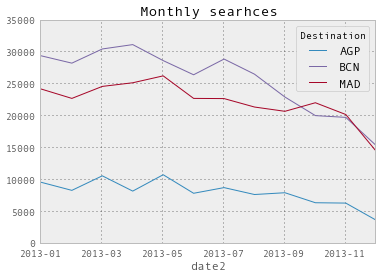

In [86]:
import matplotlib.pyplot as plt
from matplotlib import cm
pd.options.display.mpl_style = 'default'
cmap = cm.get_cmap('Spectral') 


pl.plot(title = 'Monthly searhces')

# 4 match searches and bookings

In [6]:
def info_s(df):
    tmp = pd.DataFrame()
    tmp['date_'] = df['Date']
    tmp['dst_'] = df['Destination']
    tmp['orig_'] = df['Origin']
    tmp['oid_'] =df['OfficeID']
    return tmp

def info_b(df):
    tmp = pd.DataFrame()
    tmp['date_'] = df['act_date']
    tmp['dst_'] = df['arr_port']
    tmp['orig_'] = df['dep_port']
    tmp['oid_'] =df['pos_oid']
    return tmp


In [11]:
searches = pd.DataFrame()
bookings = pd.DataFrame()

search_files = listdir('searches')
for f in search_files:
    df = pd.read_csv('searches/'+f, sep = ';', names = table_names2)
    searches = searches.append(info_s(df))
    #print f
    del(df)
    


/Library/Python/2.7/site-packages/pandas-0.14.1-py2.7-macosx-10.9-intel.egg/pandas/io/parsers.py:1139: DtypeWarning: Columns (44) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)
/Library/Python/2.7/site-packages/pandas-0.14.1-py2.7-macosx-10.9-intel.egg/pandas/io/parsers.py:1139: DtypeWarning: Columns (40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)
/Library/Python/2.7/site-packages/pandas-0.14.1-py2.7-macosx-10.9-intel.egg/pandas/io/parsers.py:1139: DtypeWarning: Columns (40,41,42,44) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [12]:
searches.head()

,date_,dst_,orig_,oid_
0,2013-01-01,AUH,TXL,624d8c3ac0b3a7ca03e3c167e0f48327
1,2013-01-01,MIL,ATH,b0af35b31588dc4ab06d5cf2986e8e02
2,2013-01-01,SFO,ICT,3561a60621de06ab1badc8ca55699ef3
3,2013-01-01,ARN,RNB,1864e5e8013d9414150e91d26b6a558b
4,2013-01-01,MAD,OSL,1ec336348f44207d2e0027dc3a68c118


In [13]:
book_files = listdir('tables')
print book_files



['.ipynb_checkpoints', 'bookings_1.csv', 'bookings_10.csv', 'bookings_100.csv', 'bookings_11.csv', 'bookings_12.csv', 'bookings_13.csv', 'bookings_14.csv', 'bookings_15.csv', 'bookings_16.csv', 'bookings_17.csv', 'bookings_18.csv', 'bookings_19.csv', 'bookings_2.csv', 'bookings_20.csv', 'bookings_21.csv', 'bookings_22.csv', 'bookings_23.csv', 'bookings_24.csv', 'bookings_25.csv', 'bookings_26.csv', 'bookings_27.csv', 'bookings_28.csv', 'bookings_29.csv', 'bookings_3.csv', 'bookings_30.csv', 'bookings_31.csv', 'bookings_32.csv', 'bookings_33.csv', 'bookings_34.csv', 'bookings_35.csv', 'bookings_36.csv', 'bookings_37.csv', 'bookings_38.csv', 'bookings_39.csv', 'bookings_4.csv', 'bookings_40.csv', 'bookings_41.csv', 'bookings_42.csv', 'bookings_43.csv', 'bookings_44.csv', 'bookings_45.csv', 'bookings_46.csv', 'bookings_47.csv', 'bookings_48.csv', 'bookings_49.csv', 'bookings_5.csv', 'bookings_50.csv', 'bookings_51.csv', 'bookings_52.csv', 'bookings_53.csv', 'bookings_54.csv', 'bookings_55

In [14]:
bookings = pd.DataFrame()

for f in book_files[1:]:
    df = pd.read_csv('tables/'+f, sep = ';', names = table_names)
    bookings = bookings.append(info_b(df))
    #print f
    del(df)

/Library/Python/2.7/site-packages/pandas-0.14.1-py2.7-macosx-10.9-intel.egg/pandas/io/parsers.py:1139: DtypeWarning: Columns (7,8,27) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [15]:
bookings['date_'] =  pd.Series([x.split(' ')[0] for x in bookings['date_'].tolist()])

In [16]:
bookings['size'] = 1
searches['size'] = 1

In [18]:
b_grouped = bookings.groupby(['date_', 'dst_', 'orig_', 'oid_']).sum().reset_index()
s_grouped = searches.groupby(['date_', 'dst_', 'orig_','oid_']).sum().reset_index()

In [19]:
merged1 = pd.merge(b_grouped, s_grouped, on = ['date_', 'oid_'])

In [21]:
merged1.head()

,date_,dst__x,orig__x,oid_,size_x,dst__y,orig__y,size_y
0,2013-01-01,ACC,SMF,3561a60621de06ab1badc8ca55699ef3,10,ATL,GUA,57
1,2013-01-01,ACC,SMF,3561a60621de06ab1badc8ca55699ef3,10,BLR,IAH,90
2,2013-01-01,ACC,SMF,3561a60621de06ab1badc8ca55699ef3,10,CDG,MIA,57
3,2013-01-01,ACC,SMF,3561a60621de06ab1badc8ca55699ef3,10,DAC,ORL,57
4,2013-01-01,ACC,SMF,3561a60621de06ab1badc8ca55699ef3,10,HAN,SYD,57


In [22]:
merged = pd.merge(b_grouped, s_grouped, on = ['date_', 'dst_', 'orig_', 'oid_'])

In [23]:
#merged is empty!
merged

,date_,dst_,orig_,oid_,size_x,size_y


In [172]:
arr_s = list(pd.unique(searches.dst_))
dep_s = list(pd.unique(searches.orig_))


In [171]:
arr_b = list(pd.unique(bookings.dst_))
dep_b = list(pd.unique(bookings.orig_))


In [170]:
intersect = list(set(arr_s) & set(arr_b))
print intersect

[]


In [173]:
intersect = list(set(dep_s) & set(dep_b))
print intersect

[]
